In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

**Bagging and Pasting in Scikit-Learn**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
print(X_train.shape[0])

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.8,   # misalnya 80% dari data
    bootstrap=True,
    n_jobs=-1
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

Gambar 7-5. Pohon Keputusan tunggal (kiri) versus kumpulan 500 pohon (kanan)

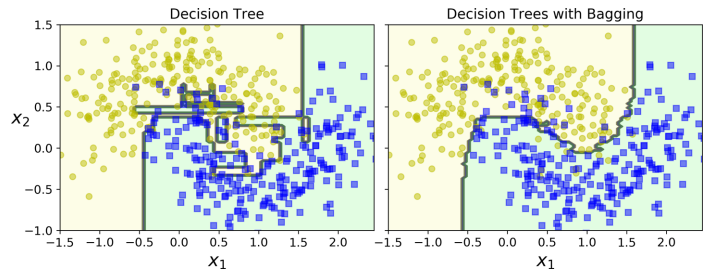


Gambar 7-5 membandingkan batas keputusan dari Pohon Keputusan tunggal dengan batas keputusan dari ensembel bagging yang terdiri dari 500 pohon (dari kode sebelumnya), keduanya dilatih pada set data moons. Seperti yang dapat Anda lihat, prediksi ensembel tersebut kemungkinan akan digeneralisasi jauh lebih baik daripada prediksi Pohon Keputusan tunggal: ensembel tersebut memiliki bias yang sebanding tetapi varians yang lebih kecil (membuat jumlah kesalahan yang hampir sama pada set pelatihan, tetapi batas keputusannya kurang tidak teratur).

**Out-of-Bag Evaluation**

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True)

In [ ]:
bag_clf.fit(X_train, y_train)

In [ ]:
bag_clf.oob_score_

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
bag_clf.oob_decision_function_

**Random Patches and Random Subspaces**

Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

**Feature Importance**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
  print(name, score)

**AdaBoost**

Salah satu cara bagi prediktor baru untuk mengoreksi pendahulunya adalah dengan memberikan sedikit lebih banyak perhatian pada contoh pelatihan yang kurang sesuai dengan pendahulunya. Hal ini menyebabkan prediktor baru semakin berfokus pada kasus-kasus sulit. Ini adalah teknik yang digunakan oleh AdaBoost.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

**Gradient Boosting**

Algoritma boosting lain yang sangat populer adalah Gradient Boosting.
17 Sama seperti AdaBoost,
Gradient Boosting bekerja dengan menambahkan prediktor secara berurutan ke suatu ensemble, masing-masing
mengoreksi prediktor sebelumnya. Namun, alih-alih mengubah bobot instans pada setiap
iterasi seperti yang dilakukan AdaBoost, metode ini mencoba menyesuaikan prediktor baru dengan kesalahan residual
yang dibuat oleh prediktor sebelumnya.
Mari kita bahas contoh regresi sederhana, dengan menggunakan Pohon Keputusan sebagai prediktor dasar (tentu saja, Gradient Boosting juga berfungsi baik dengan tugas regresi). Ini disebut
Gradient Tree Boosting, atau Gradient Boosted Regression Trees (GBRT). Pertama, mari kita
menyesuaikan DecisionTreeRegressor ke set pelatihan (misalnya, set pelatihan kuadrat yang bising):

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

Selanjutnya, kita akan melatih DecisionTreeRegressor kedua pada kesalahan residual yang dibuat oleh prediktor pertama:

In [ ]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

Kemudian kami melatih regresor ketiga pada kesalahan residual yang dibuat oleh prediktor kedua:

In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

Sekarang kita memiliki ensembel yang berisi tiga pohon. Ensembel dapat membuat prediksi pada
instance baru hanya dengan menambahkan prediksi semua pohon:

In [ ]:
X_new = X[:1]
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)